<a href="https://colab.research.google.com/github/cfreeman22/data_mining_1_D209/blob/main/D209_data_mining1_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#inporting GridSearch and Pipeline from theesklearn library
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectFromModel
# Library to split data
from sklearn.model_selection import train_test_split

# importing the Random Forest classifier
from sklearn.ensemble import RandomForestRegressor

  
from yellowbrick.regressor import ResidualsPlot

#importing metric to test our model
# to check model performance
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score


In [2]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [3]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the data from my google drive.
df = pd.read_csv('/content/drive/My Drive/churn_clean.csv')

## Data Preparation steps

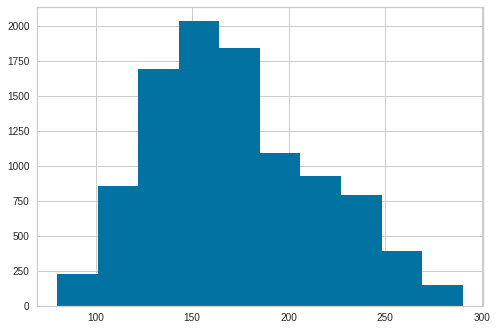

In [6]:
#target variable
df.MonthlyCharge.hist()


In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
#Checking for null
df.isnull().values.any()

False

In [9]:
# Dropping unnecessary columns
cols_to_drop =['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'Lat', 'Lng', 'TimeZone','City', 'State', 'County','Job','Population' ]

# Dropping unnecessary columns
df = df.drop(cols_to_drop, axis = 1)

# renaming the survey items columns
df = df.rename(columns={'Item1': 'TimelyResponse','Item2': 'TimelyFixes' , 'Item3': 'TimelyReplacements', 'Item4': 'Reliability',

                          'Item5': 'Options', 'Item6': 'RespectfulResponse', 'Item7': 'CourteousExchange', 'Item8': 'ActiveListening'})

# Checking to confirm if unnecessary columns were dropped and survey columns renamed appropriately

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Email                 10000 non-null  int64  
 9   Contacts              10000 non-null  int64  
 10  Yearly_equip_failure  10000 non-null  int64  
 11  Techie                10000 non-null  object 
 12  Contract              10000 non-null  object 
 13  Port_modem            10000 non-null  object 
 14  Tablet                10000 non-null  object 
 15  InternetService     

In [10]:
#extracting categorical variables
cat_vars =  df.select_dtypes(include=['object']).columns.to_list()
cat_vars

['Area',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [11]:
# Extracting numerical variables
for x in df.columns.to_list():
  if x not in cat_vars:
    print(x)

Children
Age
Income
Outage_sec_perweek
Email
Contacts
Yearly_equip_failure
Tenure
MonthlyCharge
Bandwidth_GB_Year
TimelyResponse
TimelyFixes
TimelyReplacements
Reliability
Options
RespectfulResponse
CourteousExchange
ActiveListening


In [12]:
# Changing object type to categories
for col in cat_vars:
   df[col] = df[col].astype('category')

In [13]:
# Renaming some categories for easy processing
df.Marital = df.Marital.cat.rename_categories({"Divorced":"Divorced","Widowed": "Widowed","Separated": "Separated", "Never Married": "NeverMarried", "Married":"Married"}) 
df.Contract = df.Contract.cat.rename_categories({"Month-to-month":"month_to_month","Two Year": "TwoYear","One year": "OneYear"})
df.InternetService = df.InternetService.cat.rename_categories({"Fiber Optic":"Fiber","DSL": "DSL","None": "NoService"})
df.PaymentMethod = df.PaymentMethod.cat.rename_categories({"Electronic Check":"ElectronicCheck","Mailed Check": "MailedCheck","Bank Transfer(automatic)": "BankTransfer",
                                                           "Credit Card (automatic)": "CreditCard"}) 

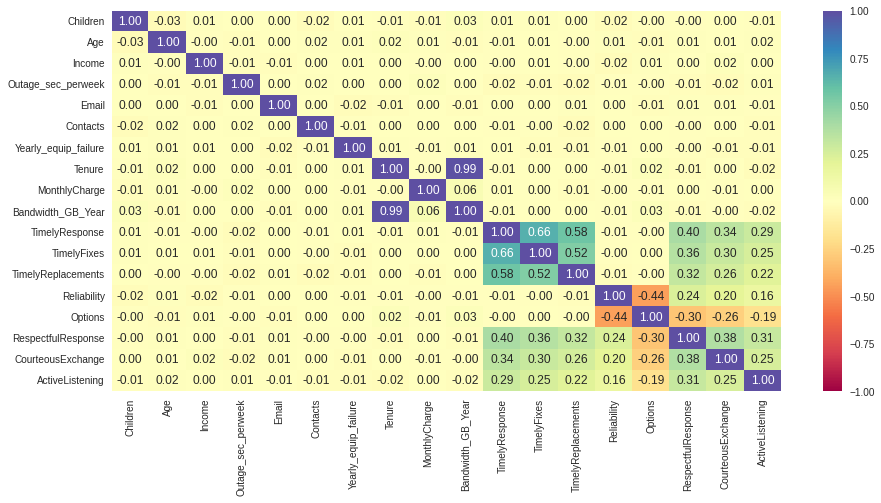

In [14]:
## Correlation matix
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [15]:
## DROP EITHER TENURE from previous analysis, it was highly correlated with Bandwidth_GB_Year
df = df.drop('Tenure', axis = 1)

## Saving the cleaned data set

In [16]:

#making a copy of the prepared dataset and extract a copy for submission

churn_df =  df.copy()

In [17]:
# cleaned and prepared data
churn_df.to_csv('cleaned_prepared_churn2.csv')

## Test Train Split and Scaling

In [18]:
X = churn_df
y = X.pop('MonthlyCharge')
#Getting dummy variables for categorical columns
X = pd.get_dummies(X, drop_first=True)

In [19]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.3, random_state=42)

In [20]:
training_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

training_set.to_csv('training_set2.csv', index=False)
test_set.to_csv('test_set2.csv', index=False)

## Random Forest 

In [21]:
 #Train the random forest classifier
rf_estimator=RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [22]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04205,0.008517,0.999999,0.999999,0.004828


In [23]:
# Checking model performance on test set
print("Test set Performance\n")
model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
model_test_perf

Test set Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.094488,0.020816,0.999995,0.999995,0.011468


In [24]:
#printing MSE for train and test sets
y_pred = rf_estimator.predict(X_test)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, rf_estimator.predict(X_train)), mse(y_test, y_pred)))

Mean Squared error on training data --> 0.0017681982550842486
Mean Squared error on test data --> 0.008927968068387878


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


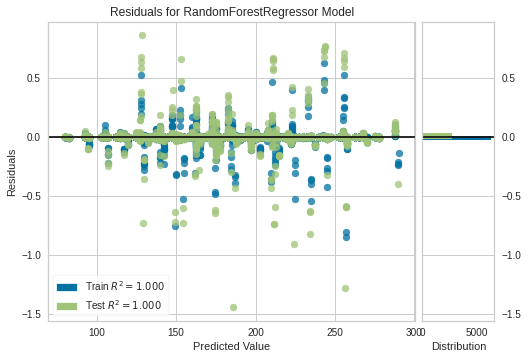

In [25]:
#Residual plot
visualizer = ResidualsPlot(rf_estimator)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

## Most important features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


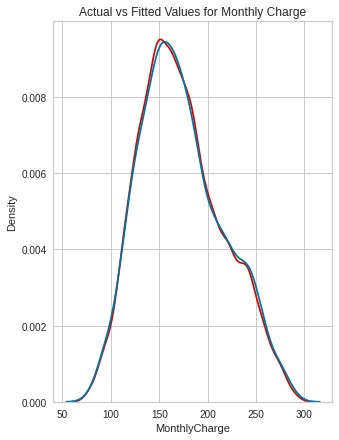

In [26]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Monthly Charge')


plt.show()
plt.close()

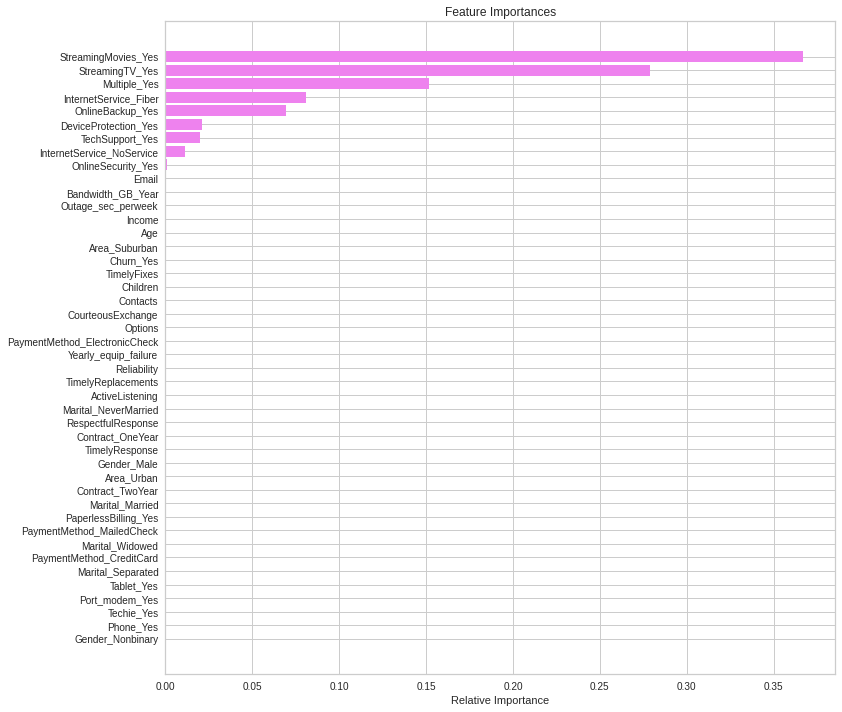

In [27]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()